In [71]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from skimage import feature
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

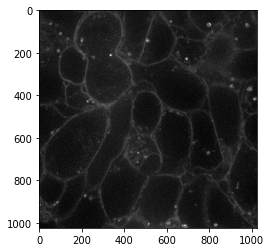

In [19]:
# original cell cut (membrane channel)
img = cv2.imread('sampleCell.png',0)
plt.imshow(img, cmap="gray")
plt.show()

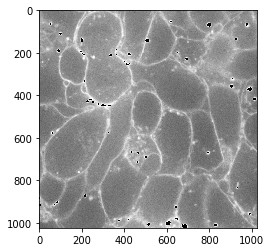

In [137]:
# upper bound denoising
upper_bound = 90
noise_point = np.zeros([img.shape[0],img.shape[1]])
noise_point[img>upper_bound] = img[img>upper_bound]
img_denoise1 = img - noise_point
plt.imshow(img_denoise1, cmap="gray")
plt.show()

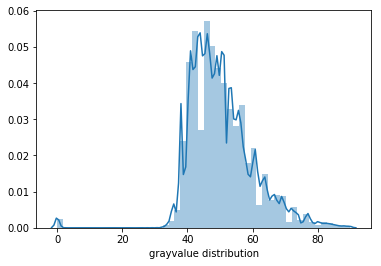

In [65]:
# grayscale distribution after denoising
grayvalue = img_denoise1.reshape(-1)
grayvalue = pd.Series(grayvalue, name="grayvalue distribution")
sns.distplot(grayvalue)

In [40]:
plt.imsave('d1.png', img_denoise1)

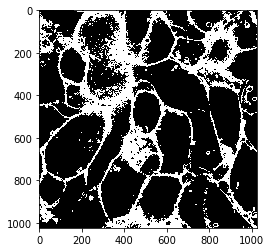

In [93]:
# lower bound denoising and normalize
lower_bound = 55
ret,thresh_img = cv2.threshold(img_denoise1,lower_bound,255,cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap="gray")
plt.show()

In [134]:
plt.imsave('thresh_img.png', thresh_img)

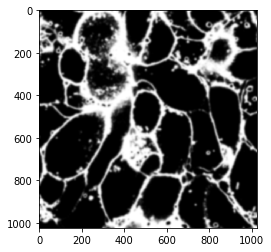

In [128]:
# gaussian filter
thresh_img2 = gaussian_filter(thresh_img, sigma=4)
plt.imshow(thresh_img2, cmap="gray")
plt.show()

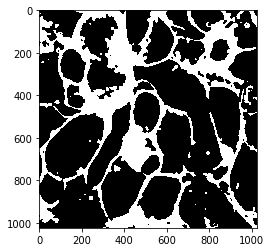

In [131]:
# binarize
ret,thresh_img3 = cv2.threshold(thresh_img2,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh_img3, cmap="gray")
plt.show()

In [135]:
plt.imsave('filtered.png', thresh_img3)

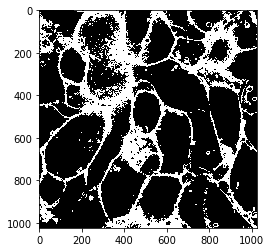

In [108]:
thresh_img_cv = cv2.imread('thresh_img.png', 0)
blur = cv2.bilateralFilter(thresh_img_cv,40,35,35)
plt.imshow(blur, cmap="gray")
plt.show()

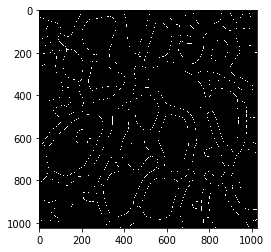

In [84]:
img_denoise2 = feature.canny(img_denoise1, sigma=18)
plt.imshow(img_denoise2, cmap="gray")
plt.show()